<a href="https://colab.research.google.com/github/odu-cs625-datavis/public-fall24-mcw/blob/main/EDA_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA) in Python

*This notebook is based on ["A Beginner’s Guide to Exploratory Data Analysis with Python"](https://deepnote.com/app/code-along-tutorials/A-Beginners-Guide-to-Exploratory-Data-Analysis-with-Python-f536530d-7195-4f68-ab5b-5dca4a4c3579), from deepnote.com*

 > By analyzing and visualizing data through EDA, we can get a true sense of what the data looks like and what kinds of questions we can answer from it. It’s also a way to discover **trends** and **patterns**, spot **outliers** and other anomalies, and answer some key research **questions**.

Notes on the EDA process from [*Python for Data Science*](https://byuidatascience.github.io/python4ds/exploratory-data-analysis.html)
> 1) **Be Curious:** During the initial phases of EDA you should feel free to *investigate every idea* that occurs to you. Some of these ideas will pan out, and some will be dead ends.  
>
> 2) **Questions:** Your goal during EDA is to develop an understanding of your data. The easiest way to do this is to *use questions as tools* to guide your investigation.  The key to asking quality questions is to *generate a large quantity of questions*.  Each new question that you ask will expose you to a new aspect of your data and increase your chance of making a discovery. You can quickly drill down into the most interesting parts of your data — and develop a set of thought-provoking questions — if you *follow up each question with a new question* based on what you find.  
>
> 3) **Outliers:** It's good practice to *repeat your analysis with and without the outliers*. If they have minimal effect on the results, and you can't figure out why they're there, it's reasonable to replace them with missing values, and move on. However, if they have a substantial effect on your results, you shouldn't drop them without justification. You'll need to figure out what caused them (e.g. a data entry error) and disclose that you removed them in your write-up.  

Finally, a word of advice on EDA from statistician [Nate Silver](https://en.wikipedia.org/wiki/Nate_Silver) via <https://x.com/NateSilver538/status/1180900333003952128>:
> A few times a year, I get asked to be a judge of student statistical projects in politics or sports. While the students are very bright, they spend WAY too much time using fancy statistical methods and not enough time framing the right questions and contextualizing their answers.
>
> If you want to be a good data scientist, you should spend ~49% of your time developing your statistical intuition (i.e. how to ask good questions of the data), and ~49% of your time on domain knowledge (improving overall understanding of your field). Only ~2% on methods per se.  




**Note:** This notebook is not meant to demonstrate a full EDA process, but demonstrates some of the techniques that you might use. It's organized based on different types of data and comparisons that you might want to make so that you are aware of and have examples of different options.

## Dataset

We'll be using a dataset that contains information on 10,000 clients of an auto insurance company. Each row corresponds to a single client, with 19 variables recording a variety of client-specific information. The `outcome` attribute indicates if the client made a claim in the past year. Data originally from this Kaggle dataset, <https://www.kaggle.com/datasets/sagnik1511/car-insurance-data/data>

### Initial Question

Before we start the analysis, we need to have at least one initial question (if not more) that will drive our exploration of the data.

❓ What type of drivers are more likely to make an insurance claim?


## Setting up the notebook and dataset

In [234]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from seaborn import axes_style

In [235]:
# set chart options for both Seaborn and Seaborn Objects
pd.set_option("display.precision", 3)  # sets the default display to 3 significant digits beyond decimal
sns.set_theme(style="ticks")
so.Plot.config.theme.update(axes_style("ticks"))

In [236]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv("https://raw.githubusercontent.com/siglimumuni/Datasets/master/customer-data.csv")

### Pandas DataFrame vs. Series

The core data structures in Pandas are **Series** and **DataFrames**. A `Series` is a one-dimensional indexed array of a single data type, while a `DataFrame` is a two-dimensional table where each column contains data of the same type. Think of a `DataFrame` as a collection of `Series` objects. `DataFrames` are ideal for representing real-world data, with each row representing an instance (such as an observation) and each column representing a feature of that instance.  (Source: <https://mlcourse.ai/book/topic01/topic01_pandas_data_analysis.html>)

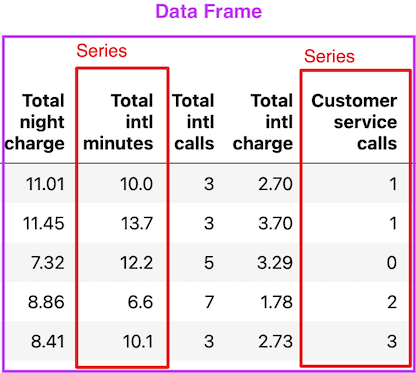

Source: <https://mlcourse.ai/book/topic01/topic01_pandas_data_analysis.html>

### Viewing the dataframe

In [237]:
#Return number of rows and columns
df.shape

(10000, 19)

In [238]:
#Return first 5 rows of the dataset
df.head()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.358,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True


In [239]:
#Return info on dataset datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  object 
 2   gender               10000 non-null  object 
 3   race                 10000 non-null  object 
 4   driving_experience   10000 non-null  object 
 5   education            10000 non-null  object 
 6   income               10000 non-null  object 
 7   credit_score         9018 non-null   float64
 8   vehicle_ownership    10000 non-null  bool   
 9   vehicle_year         10000 non-null  object 
 10  married              10000 non-null  bool   
 11  children             10000 non-null  bool   
 12  postal_code          10000 non-null  int64  
 13  annual_mileage       9043 non-null   float64
 14  vehicle_type         10000 non-null  object 
 15  speeding_violations  10000 non-null  

We can use `unique()` to find unique values for our potential categorical attributes (shown as Dtype `object`) above.  *Some of these might be ordinal if there is an inherent ordering.*

In [240]:
#Display unique values of the attribute
df['driving_experience'].unique()

array(['0-9y', '10-19y', '20-29y', '30y+'], dtype=object)

In [241]:
df['vehicle_type'].unique()

array(['sedan', 'sports car'], dtype=object)

## Preparing the data

### Missing values

We start by checking the dataset for missing or `null` values. For this, we can use the `isna()` method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the `sum()` method. This works because `True` is counted as a `1` and `False` is counted as `0`.

In [242]:
#Display number missing values per column
df.isna().sum()

,0
id,0
age,0
gender,0
race,0
driving_experience,0
education,0
income,0
credit_score,982
vehicle_ownership,0
vehicle_year,0


The attributes `credit_score` and `annual_mileage` both have a significant number of missing values.

What should we do with missing data?  
1. delete rows that contain missing data
2. replace the missing values with some value - often can use the column mean or mode (most common value)

Credit scores can be heavily influenced by a person's income situation, so we compute the mean separately for each income category using [`groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html).

In [243]:
#Check the mean credit score for each income group
df.groupby(by="income")["credit_score"].mean()

,credit_score
income,
middle class,0.524
poverty,0.348
upper class,0.614
working class,0.432


The mean credit scores for each group do differ widely as we suspected. We can go ahead and impute the missing values for the `credit_score` column using the mean credit score for each income group. The simplest way to do this would be by creating a function so we don't have to repeat codes for each income group.

In [244]:
#Create a function to impute missing values based on mean credit score for each income group
def impute_creditscore(income_classes):
    """This function takes a list of income groups and imputes the missing values of each
    based on the mean credit score for each group"""
    #iterate through each income group
    for income_class in income_classes:

        #create a subset of dataframe to use as filter
        mask = df["income"] == income_class

        #calculate the mean for the income group
        mean = df[df["income"] == income_class]["credit_score"].mean()

        #fill the missing values with mean of credit score for group
        df.loc[mask,"credit_score"] = df.loc[mask,'credit_score'].fillna(mean)

        print (income_class, mean)  # MCW: add to document what was substituted

In [245]:
#Apply the function to the dataframe
income_groups = ["poverty","upper class","middle class","working class"]
impute_creditscore(income_groups)

#check for missing values
df.isnull().sum()

poverty 0.34833133094379165
upper class 0.613826977680088
middle class 0.5236585383213972
working class 0.4319292841168608


,0
id,0
age,0
gender,0
race,0
driving_experience,0
education,0
income,0
credit_score,0
vehicle_ownership,0
vehicle_year,0


Now we can do the same thing for `annual_mileage`.  Mileage could be affected by years of driving experience, so we'll examine the means based on years driving experience.

In [246]:
#Check the mean annual mileage for the different driving experience groups
df.groupby(by="driving_experience")["annual_mileage"].mean()

,annual_mileage
driving_experience,
0-9y,12249.132
10-19y,11791.275
20-29y,11144.181
30y+,10694.969


Since these don't differ too much based on driving experience, we'll just replace the null values with the entire column mean.

In [247]:
#Calculate mean for annual_mileage column
mean_mileage = df["annual_mileage"].mean()

#Fill in null values using the column mean
df["annual_mileage"] = df["annual_mileage"].fillna(mean_mileage)
# could also be written as
# df.fillna({"annual_mileage": mean_mileage}, inplace=True)

print (mean_mileage)  # MCW: add to document what was substituted

#Check for null values
df.isna().sum()

11697.003206900365


,0
id,0
age,0
gender,0
race,0
driving_experience,0
education,0
income,0
credit_score,0
vehicle_ownership,0
vehicle_year,0


### Dropping columns

Often we have columns we know we won't be using, so we might as well drop them to make the analysis faster.

`axis=1` says that we're dropping a column  
`inplace=True` says to make the change permanent

In [248]:
#Delete the id and postal_code columns
df.drop(["id","postal_code"],axis=1,inplace=True)

We can use the `describe()` function to get summary statistics about our dataset. By default, it operates on numeric attributes (*we'll see this later*), but we can also request summary stats about other datatypes, but they have to be specified.

In [249]:
df.describe(include="bool")

,vehicle_ownership,married,children,outcome
count,10000,10000,10000,10000
unique,2,2,2,2
top,True,False,True,False
freq,6970,5018,6888,6867


In [250]:
df.describe(include="object")

,age,gender,race,driving_experience,education,income,vehicle_year,vehicle_type
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,4,2,2,4,3,4,2,2
top,26-39,female,majority,0-9y,high school,upper class,before 2015,sedan
freq,3063,5010,9012,3530,4157,4336,6967,9523


One of the things we can tell from this is that some attributes/categories aren't going to be useful in determining what type of drivers file claims:
* `race` - over 90% (9012 / 10,000) of the records are `majority`
* `vehicle_type` - over 95% of the records are `sedan`

Because there are so many of one type of data in those categories, there's not enough of other values to be able to make a claim about correlations.

We might as well drop those columns as we go forward.

In [251]:
df.drop(["race","vehicle_type"],axis=1,inplace=True)

We can use `columns` to look at the remaining attributes.

In [252]:
df.columns

Index(['age', 'gender', 'driving_experience', 'education', 'income',
       'credit_score', 'vehicle_ownership', 'vehicle_year', 'married',
       'children', 'annual_mileage', 'speeding_violations', 'DUIs',
       'past_accidents', 'outcome'],
      dtype='object')

## Analyzing the data

Now that we've prepared the data, let's revisit our main question:

❓ **What type of drivers are more likely to make an insurance claim?**

While several different types of analyses exist for EDA, we can group them under three large umbrellas: univariate analysis, bivariate analysis, and multivariate analysis. We'll organize our exploration according to these for this tutorial. (You do not have to follow this exact procedure in every analysis -- much of this is demonstrating techniques that you *could* use.)

 ### Univariate analysis

 Univariate analysis is the simplest form of analyzing data. As the name implies, it deals with analyzing data within a single column or variable and is mostly used to describe data.

#### Categorical unordered

👉 **MCW**: This is our "categorical" attribute type.


In [253]:
#Check the count for each category in the "gender" column
df["gender"].value_counts()

,count
gender,
female,5010
male,4990


👉 **MCW:** This chart is in the tutorial, but since we can see the values above, there's really no point to creating this chart.

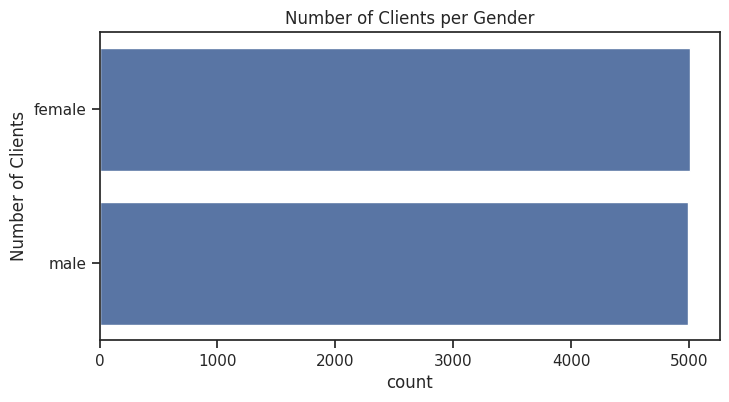

In [254]:
#Create a countplot to visualize the count of each category in the gender column.
plt.figure(figsize=[8,4])
#sns.countplot(data=df,x="gender")
sns.countplot(df['gender'])  # simpler way, horizontal by default
plt.title("Number of Clients per Gender")
plt.ylabel("Number of Clients")
plt.show()

#### Categorical ordered

👉 **MCW**: We would call this "ordinal".

👉 **MCW**: I'm leaving this pie chart from the tutorial in since there are only 4 categories, but it's not my favorite idiom.

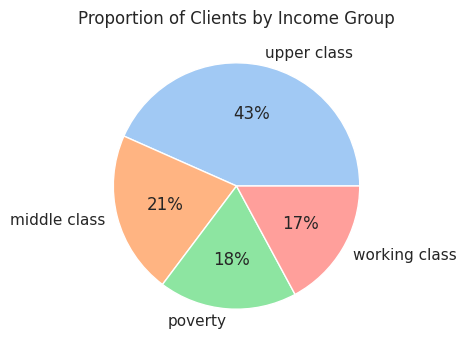

In [255]:
#Define plot size
plt.figure(figsize=[4,4])

#Define column to use
data = df["income"].value_counts(normalize=True)

#Define labels
labels = ["upper class","middle class","poverty","working class"]

#Define color palette
colors = sns.color_palette('pastel')

#Create pie chart
plt.pie(data,labels=labels,colors=colors, autopct='%.0f%%')
plt.title("Proportion of Clients by Income Group")
plt.show()

[`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) works just as well as the pie chart

In [256]:
# use normalize=True to show proportions in each category
df["income"].value_counts(normalize=True)

,proportion
income,
upper class,0.434
middle class,0.214
poverty,0.181
working class,0.171


One thing we'll need to remember (and potentially account for) in our analysis is that almost half of our clients are in the "upper class" income category.

In [257]:
df["education"].value_counts(normalize=True)

,proportion
education,
high school,0.416
university,0.393
none,0.192


We can use `order` to add an intentional ordering of the bars, from more education to less, since this is an ordinal attribute.

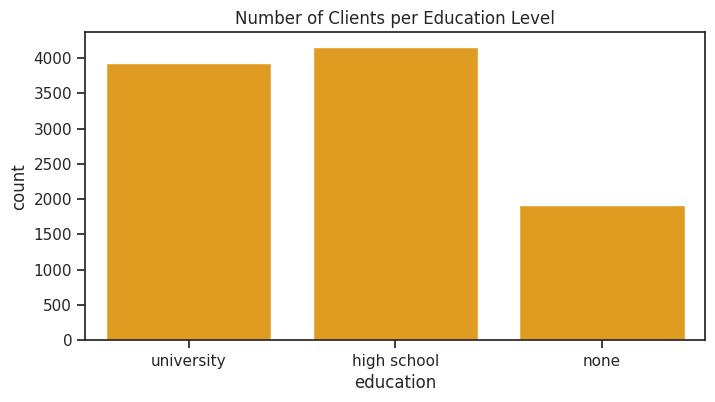

In [258]:
#Create a countplot to visualize the count of each category in the education column
plt.figure(figsize=[8,4])
sns.countplot(data=df,x="education",order=["university","high school","none"],color="orange")
plt.title("Number of Clients per Education Level")
plt.show()

Just for reference, here's how to use `value_counts()` to create an ordering by value.

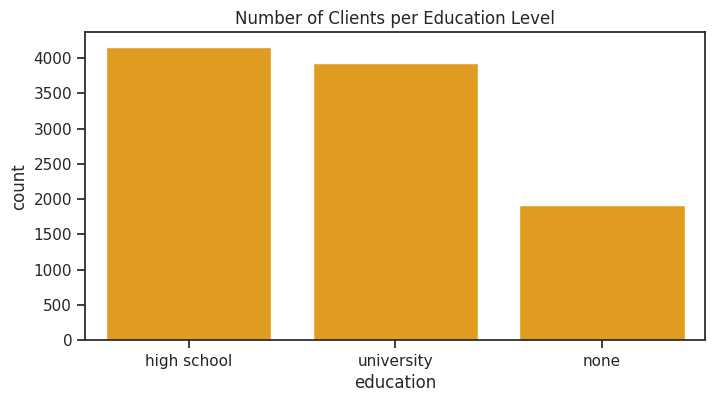

In [259]:
plt.figure(figsize=[8,4])
# Calculate the order based on value counts
order = df['education'].value_counts().index
sns.countplot(data=df,x="education",order=order,color="orange")
plt.title("Number of Clients per Education Level")
plt.show()

#### Numeric

👉 **MCW:** We would call this "quantitative".

In [260]:
#Return summary statistics for our numeric attributes (`int64` and `float64`)
df.describe()

,credit_score,annual_mileage,speeding_violations,DUIs,past_accidents
count,10000.000,10000.000,10000.000,10000.000,10000.000
mean,0.515,11697.003,1.483,0.239,1.056
std,0.135,2680.167,2.242,0.555,1.652
min,0.053,2000.000,0.000,0.000,0.000
25%,0.421,10000.000,0.000,0.000,0.000
50%,0.524,11697.003,0.000,0.000,0.000
75%,0.614,13000.000,2.000,0.000,2.000
max,0.961,22000.000,22.000,6.000,15.000


The only attributes that seem to have an interesting distribution (with values other than 0 up to the 50% percentile) are `credit_score` and `annual_mileage`, so let's look at those closer.

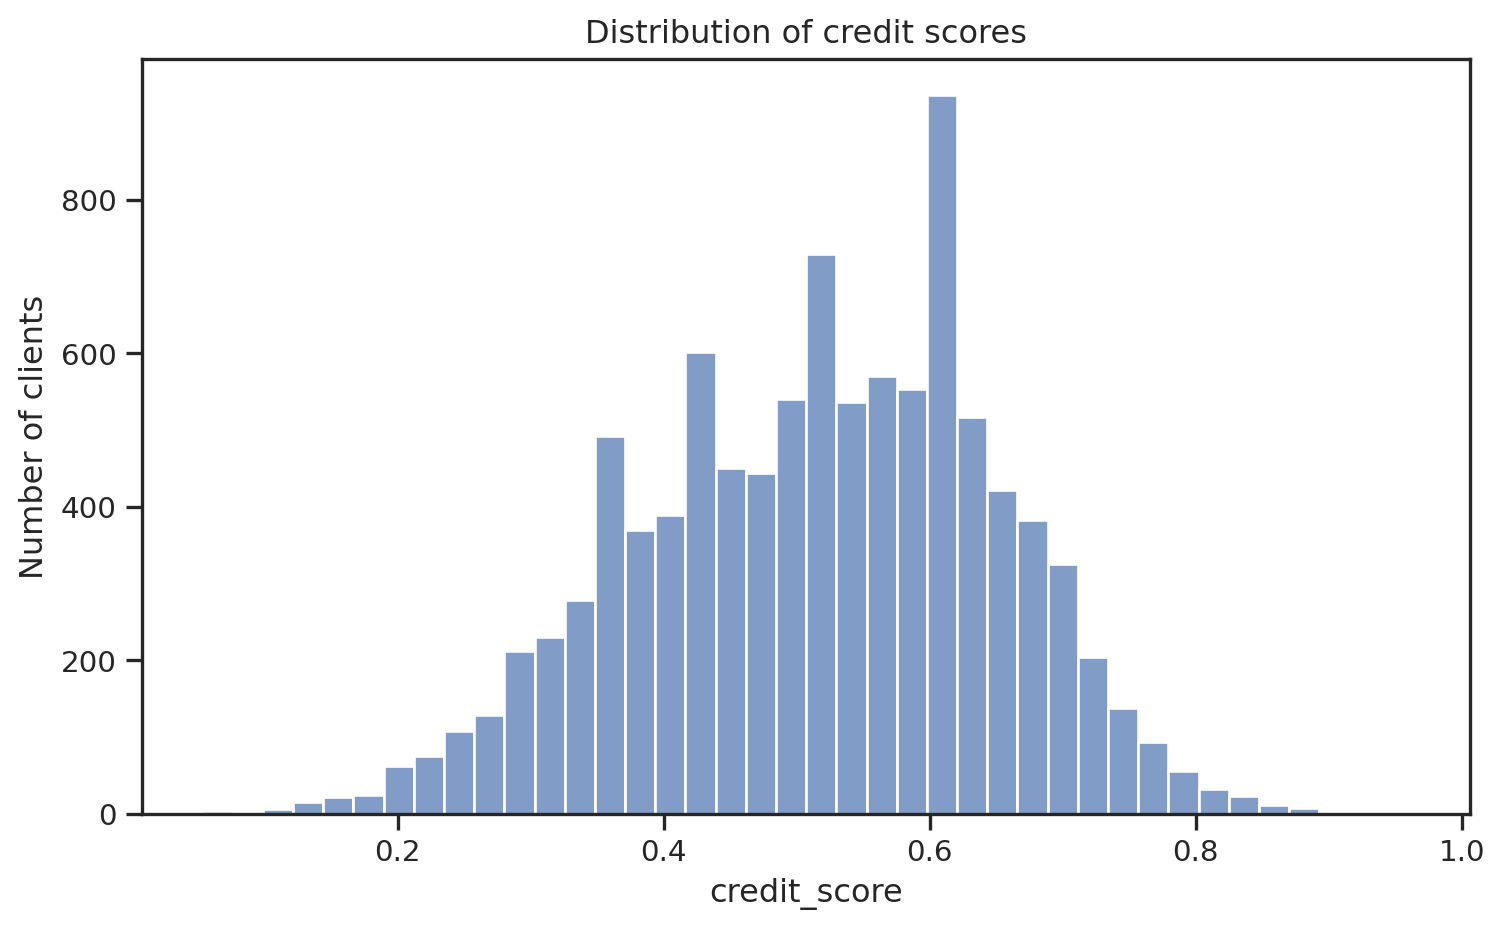

In [261]:
#Plot a histogram using the "credit_score" column - uses regular Seaborn
#plt.figure(figsize=[8,5])
#sns.histplot(data=df,x="credit_score",bins=40).set(title="Distribution of credit scores",
#                                                   ylabel="Number of clients")
#plt.show()

# uses Seaborn Objects
(so.Plot(df, "credit_score")
   .add(so.Bars(), so.Hist(bins=40))
   .label(y="Number of clients", title="Distribution of credit scores")
   .layout(size=(8,5))
)

This follows roughly a normal distribution.  

However, note the four spikes and remember that we set a bunch of the values that had been null to the same mean based on the four different income levels:

```
poverty 0.3483313309437917
working class 0.43192928411686077
middle class 0.5236585383213972
upper class 0.613826977680088
```

Here's the corresponding boxplot.

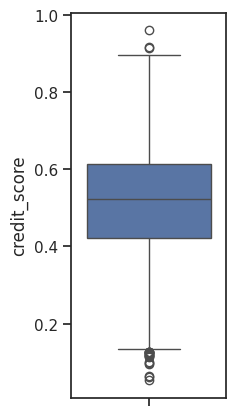

In [262]:
plt.figure(figsize=[2,5])
sns.boxplot(df, y="credit_score")
plt.show()

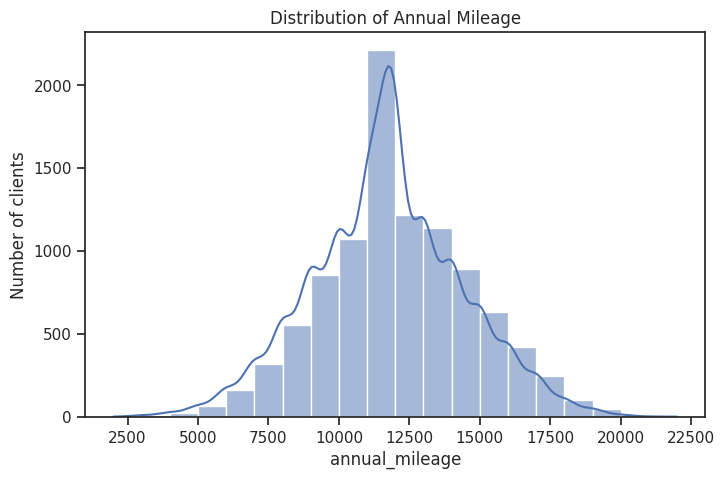

In [263]:
#Plot a histogram using the "annual_mileage" column
plt.figure(figsize=[8,5])
sns.histplot(data=df,x="annual_mileage",bins=20,kde=True).set(title="Distribution of Annual Mileage",
                                                              ylabel="Number of clients")
plt.show()

Again, we have a normal distribution, but also this is an attribute where we replaced a lot of null values with the mean:
```
11697.003206900365
```

### Bivariate Analysis

Bivariate analysis involves analyzing data with two attributes. This is usually a way to explore the relationships between these variables and how they influence each other, if at all.

#### Numeric-Numeric

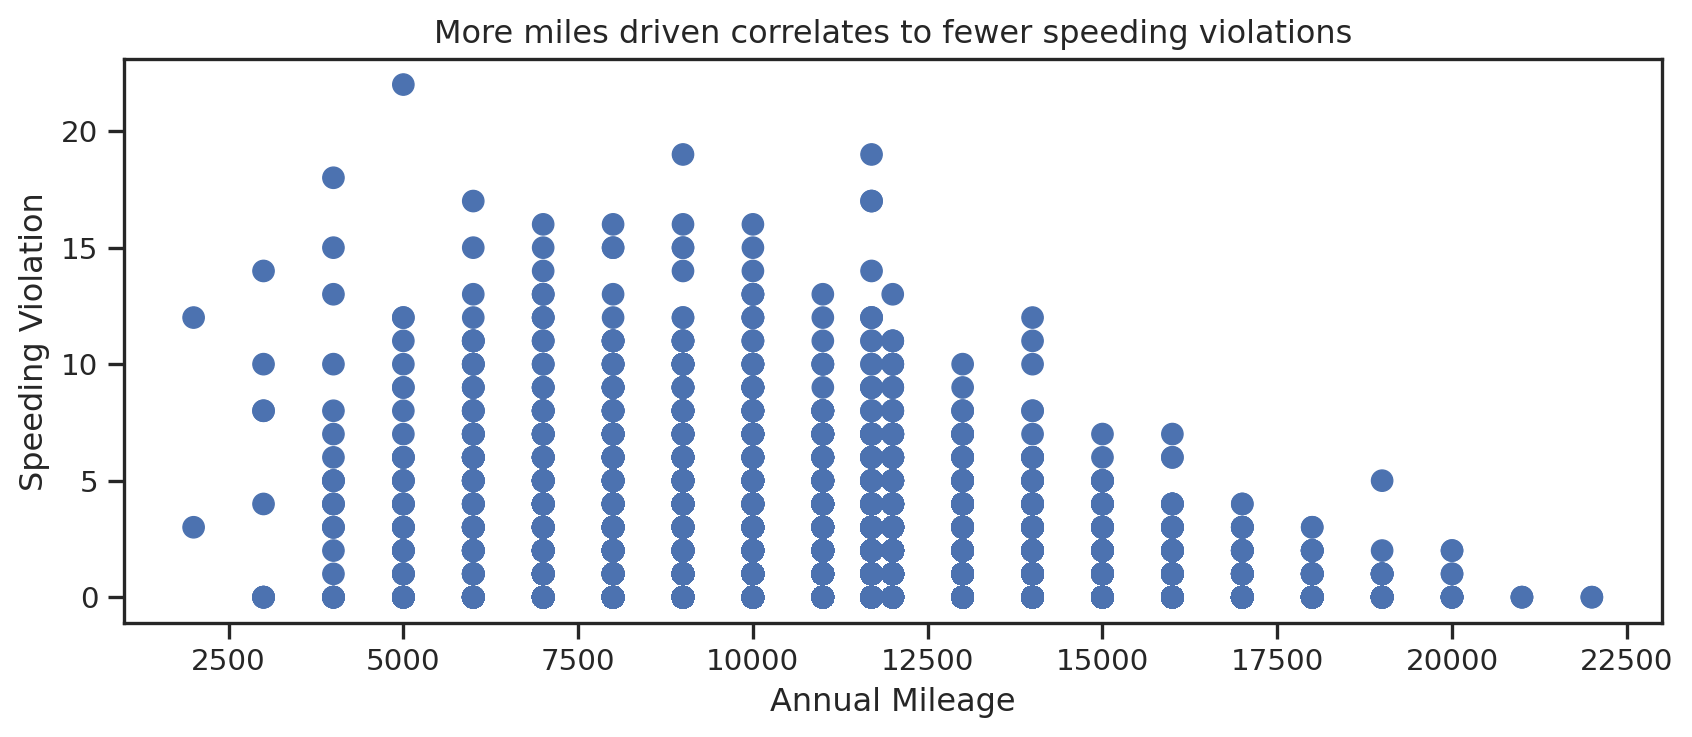

In [264]:
#Create a scatter plot to show relationship between "annual_mileage" and "speeding_violations"
#plt.figure(figsize=[8,4])
#plt.scatter(data=df,x="annual_mileage",y="speeding_violations")
#plt.title("Annual Mileage vs Speeding Violations")
#plt.ylabel("Speeding Violations")
#plt.xlabel("Annual Mileage")
#plt.show()

# using Seaborn Objects
(so.Plot(df,x="annual_mileage", y="speeding_violations")
   .add(so.Dot(pointsize=8))
   .label(y="Speeding Violation", x="Annual Mileage",
          title = "More miles driven correlates to fewer speeding violations")
   .layout(size=(9,4))
)

🔎 **Observation:** The more miles a client drives per year, the fewer speeding violations they commit.

❗👉 Note that correlation != causation. Just because two attributes are correlated does not mean that one caused the other. (We'll see later why this particular correlation does not appear to be causally linked.)

Here are two humorous examples:
* Man stopping and starting a subway train, <https://x.com/AmeetRKini/status/1186491285919731713>
* Cat wrecking a motorcyle on TV, <https://x.com/bioluisinho/status/1224404802693668864>

We could also use a correlation matrix to get more specific information about the relationship between these two variables. A correlation matrix is useful for identifying the relationship between several variables.

In [265]:
#Create a correlation matrix to show relationship between select variables
corr_matrix = df[["speeding_violations","DUIs","past_accidents"]].corr()
corr_matrix

,speeding_violations,DUIs,past_accidents
speeding_violations,1.000,0.360,0.443
DUIs,0.360,1.000,0.259
past_accidents,0.443,0.259,1.000


Correlation coefficient
* 0.80-1.0 - very strong positive correlation
* 0.60-0.79 - strong positive correlation
* 0.40-0.59 - moderate positive correlation
* 0.20-0.39 - weak positive correlation
* 0-0.19 - very weak positive correlation

Similiar categories for negative correlation, with negative coefficients

However, these are rather arbitrary limits, and the context of the results should be considered.

Source: <https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/11-correlation-and-regression>

We can use a heatmap to visualize the data in the correlation matrix to make it easier to spot strong correlations.  We just need to pass `corr_matrix` into  `sns.heatmap()`.

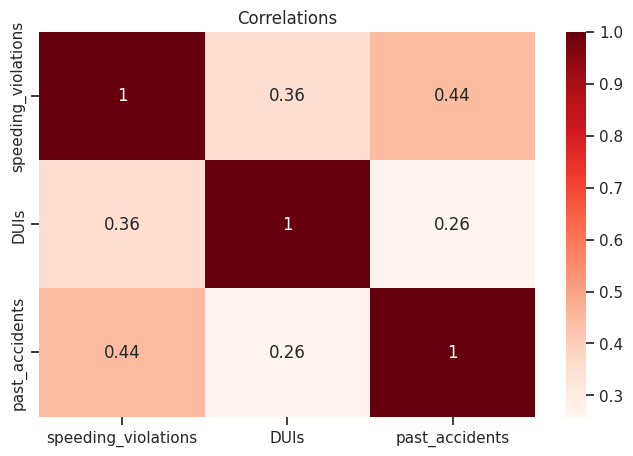

In [266]:
#Create a heatmap to visualize correlation
plt.figure(figsize=[8,5])
sns.heatmap(corr_matrix,annot=True,cmap='Reds')
plt.title("Correlations")
plt.show()

🔎 **Observation:** A moderate, positive correlation exists between the number of past accidents and speeding violations.

🔎 **Observation:** A weak, positive correlation exists between the number of past accidents and DUIs.

Another way to get an overview of how all of the numerical values relate to each other is to use a scatterplot matrix (SPLOM) using [`sns.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html). This creates a matrix showing the relationship of each pair of specified attributes. The diagonal is a histogram of the relevant attribute.

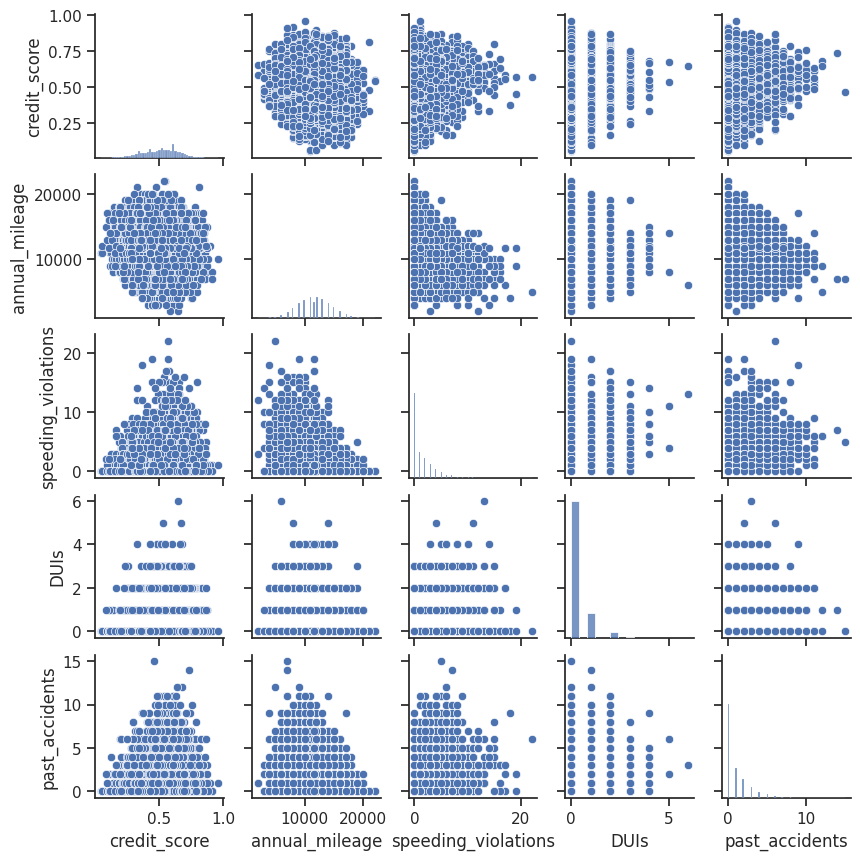

In [267]:
sns.pairplot(df,
             vars=['credit_score', 'annual_mileage', 'speeding_violations', 'DUIs', 'past_accidents'],
             height=1.75)

This doesn't immediately highlight any direct strong correlations between the numeric attributes, so we'll keep looking.

#### Numeric-Categorical

The following analysis looks at the `outcome` attribute, which tells us if the client has filed an insurance claim in the past year (`True`) or not (`False`). This is the feature that we want to focus on with our main question.

In [268]:
#Check the mean annual mileage per category in the outcome column
df.groupby('outcome')['annual_mileage'].mean()

,annual_mileage
outcome,
False,11375.550
True,12401.574


This just gives us a summary that the annual mileage for those who did not file a claim was about 11.4k and for those who did file a claim was about 12.4k. Not very meaningful yet.

We can use `describe()` to get more summary statistics than just the means.

In [269]:
df.groupby('outcome')['annual_mileage'].describe()

,count,mean,std,min,25%,50%,75%,max
outcome,,,,,,,,
False,6867.0,11375.550,2581.965,2000.0,10000.0,11697.003,13000.0,20000.0
True,3133.0,12401.574,2755.954,3000.0,11000.0,12000.000,14000.0,22000.0


We can use a boxplot to visualize these summary statistics.

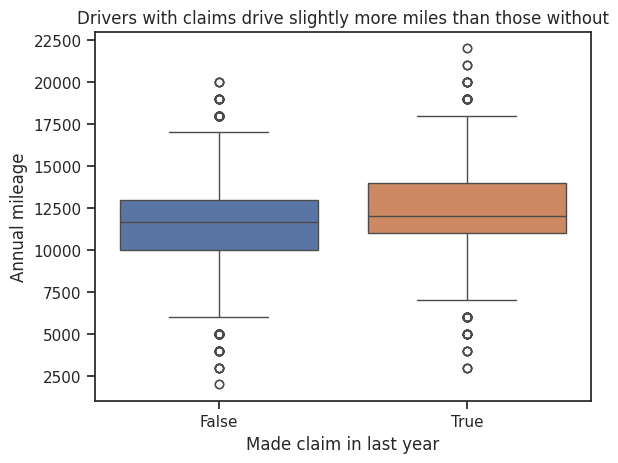

In [270]:
#Plot two boxplots to compare dispersion
ax = sns.boxplot(data=df, x="outcome", y='annual_mileage', hue="outcome", legend=False)
plt.title("Drivers with claims drive slightly more miles than those without")
ax.set_xlabel ("Made claim in last year")
ax.set_ylabel ("Annual mileage")
plt.show()

There's not a lot of difference between the medians or the 25th/75th percentiles for these distributions, so it doesn't look like annual mileage contributes much to if a claim is made or not.

To demonstrate a different visualization, we'll use overlapping histograms to compare the distributions based on credit score.  Setting the `hue` parameter splits the histograms based on the `outcome` attribute.

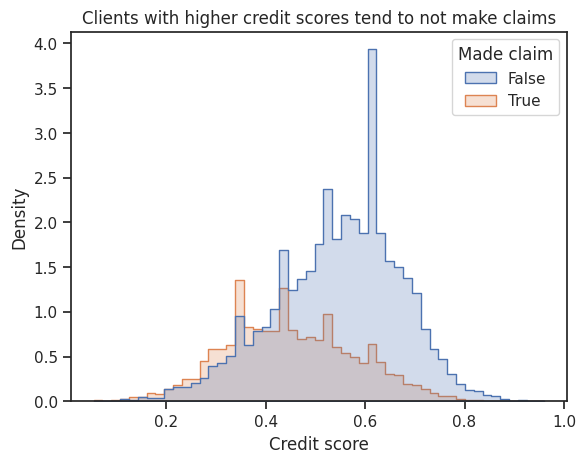

In [271]:
#Create histograms to compare distribution
ax = sns.histplot(df,x="credit_score",hue="outcome",element="step",stat="density")
plt.title("Clients with higher credit scores tend to not make claims")
ax.set_xlabel ("Credit score")
ax.legend_.set_title("Made claim")
plt.show()

🔎 **Observation:** This seems to indicate that those with higher credit scores are less likely to make claims.

#### Categorical-Categorical

The first thing we'll do here is take the `outcome` column and convert it to a claim rate.  When we look at splitting up the clients based on certain attributes, we'll show the average claim rate, which will normalize the values.  For instance, a claim rate of 0.2 could mean that 1 out of 5 clients made a claim or that 4 out of 20 did.

In [272]:
#Create a new "claim rate" column
df['claim_rate'] = np.where(df['outcome']==True,1,0)
df['claim_rate'].value_counts()

,count
claim_rate,
0,6867
1,3133


🔎 **Observation:** Twice as many clients did not make a claim in the past year as those that did.

In the following charts, we'll be using [`groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) and [`mean()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html) to calculate the mean claim rate for various groups of clients. It's important to note that `mean()` returns a `Series`, which we have to plot in a different way.

In [273]:
df.groupby('age')['claim_rate'].mean()

,claim_rate
age,
16-25,0.718
26-39,0.337
40-64,0.156
65+,0.098


The following charts use [`pandas.Series.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html) to quickly plot the result of a Series

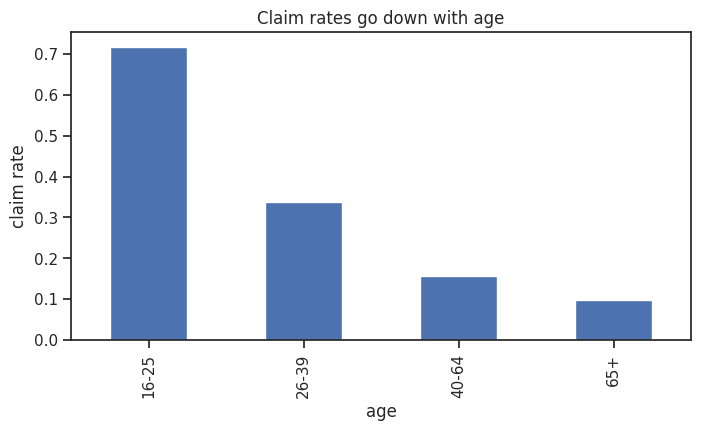

In [274]:
#Plot the average claim rate per age group
plt.figure(figsize=[8,4])
ax = df.groupby('age')['claim_rate'].mean().plot(kind="bar")
ax.set_ylabel ("claim rate")
plt.title("Claim rates go down with age")
plt.show()


🔎 **Observation:** Younger people are more likely to make an insurance claim. (70% of young people make an insurance claim.)

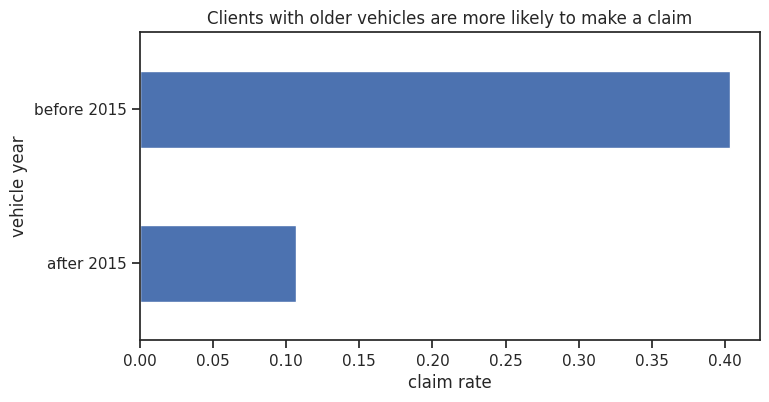

In [275]:
#Plot the average claim rate per vehicle year category
plt.figure(figsize=[8,4])
ax=df.groupby('vehicle_year')['claim_rate'].mean().plot(kind="barh")
ax.set_xlabel ("claim rate")
ax.set_ylabel ("vehicle year")
plt.title("Clients with older vehicles are more likely to make a claim")
plt.show()

🔎 **Observation:**  Clients with older vehicles are much more likely to file a claim.

Here we'll create side-by-side charts to look how education and income affect claim rate.

Text(0, 0.5, 'claim probability')

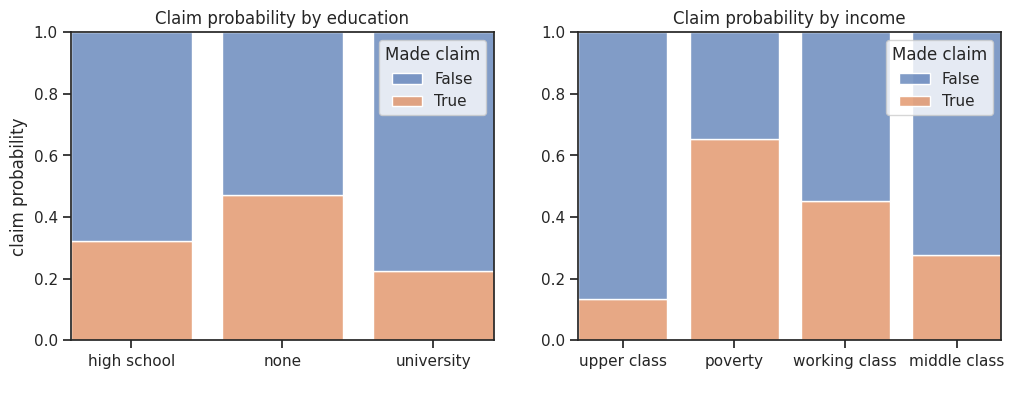

In [276]:
#Create an empty figure object
fig, axes = plt.subplots(1,2,figsize=(12,4))

#Plot two probability graphs for education and income
for i,col in enumerate(["education","income"]):
    sns.histplot(df, ax=axes[i],x=col, hue="outcome",stat="probability",
                 multiple="fill", shrink=.8,alpha=0.7)
    axes[i].set(title="Claim probability by "+ col,ylabel=" ",xlabel=" ")
    axes[i].legend_.set_title("Made claim")
axes[0].set_ylabel ("claim probability")

🔎 **Observation:** Clients with no education are slightly more likely to file a claim compared to high school and university graduates.

🔎 **Observation:** Clients in the poverty income group are more likely to file a claim.

### Multivariate Analysis

Multivariate analysis involves more than 2 variables.

For this example, we'll use a heatmap to examine the relationship between education and income as it relates to claim rate. This will be a way to combine the data from the previous stacked bar charts that showed claim rate separately for education and income.

First, we create a [pivot table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html) that computes and stores the mean claim rate for different combinations of education and income.

In [277]:
#Create a pivot table for education and income with average claim rate as values
edu_income = pd.pivot_table(data=df,index='education',columns='income',
                            values='claim_rate',aggfunc='mean')
edu_income

income,middle class,poverty,upper class,working class
education,,,,
high school,0.255,0.672,0.118,0.451
none,0.210,0.641,0.099,0.395
university,0.335,0.649,0.143,0.551


We can use `center` parameter in the [`sns.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function to specify where the center in the diverging colormap goes.  In these charts, we'll set center to 0.15, meaning that values below 15% claim rate will show as blue, those at 15% will show as gray, and those above will increase saturation towards red.

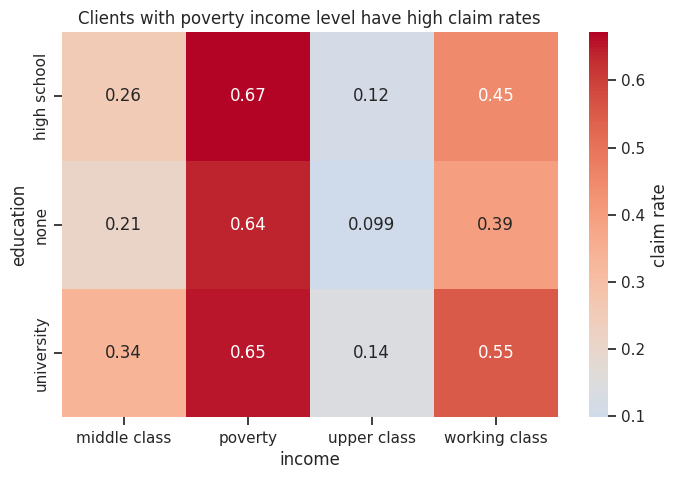

In [278]:
#Create a heatmap to visualize income, education and claim rate
plt.figure(figsize=[8,5])
sns.heatmap(edu_income,annot=True,cmap='coolwarm', center=0.15,
            cbar_kws={'label': 'claim rate'})
plt.title("Clients with poverty income level have high claim rates")
plt.show()

The heatmap is showing for each category of client, the percentage that made a claim in the last year. For example, 45% of the clients with a high school education and with a working class income made a claim.

🔎 **Observation:** High school graduates in the poverty income class have the highest claim rate, but not by much. The poverty income class tends to determine claim rate more than education.

🔎 **Observation:** Clients in the upper class income with no education have the lowest claim rate, but again it appears that it's the income level that is more related to claim rate than education.

Note that "none" education could just mean that the driver is a teenager and hasn't completed high school yet.

🔎 **Observation:** For these two categories, it's the poverty income class that has the highest claim rates.

Let's now look at driving experience and marital status with claim rate.

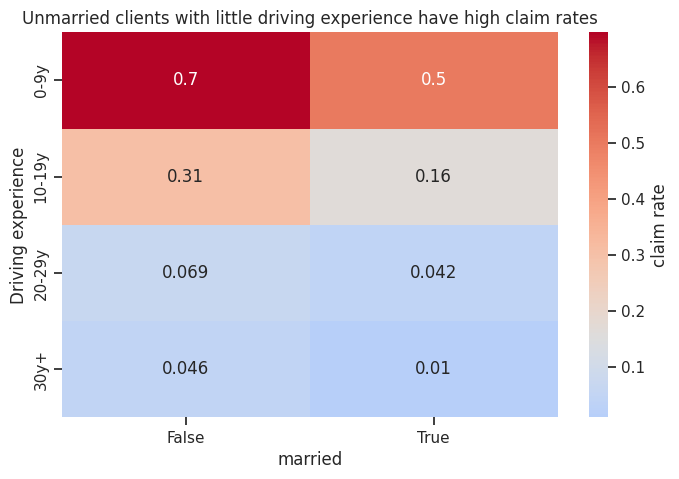

In [279]:
#Create pivot table for driving experience and marital status with average claim rate as values
driv_married = pd.pivot_table(data=df,index='driving_experience',columns='married',values='claim_rate')

#Create a heatmap to visualize driving experience, marital status and claim rate
plt.figure(figsize=[8,5])
ax = sns.heatmap(driv_married,annot=True,cmap='coolwarm', center=0.15,
            cbar_kws={'label': 'claim rate'})
ax.set_ylabel ("Driving experience")
plt.title("Unmarried clients with little driving experience have high claim rates")
plt.show()

🔎 **Observation:** Unmarried individuals with 0-9 years of driving experience are the most likely to file a claim. (These are likely going to be younger individuals, like teens.)

🔎 **Observation:** Married individuals with 30+ years of driving experience are the least likely to file a claim, though anyone with more than 20 years of driving experience has a low claim rate.

Finally for this set of analysis, we'll look at gender and family status with claim rate.

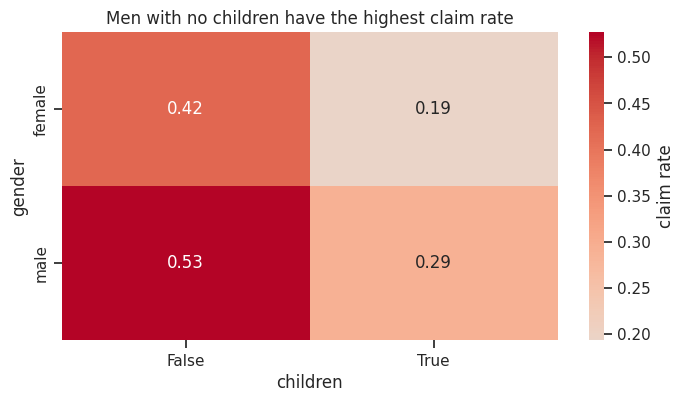

In [280]:
#Create pivot table for gender and family status with average claim rate as values
gender_children = pd.pivot_table(data=df,index='gender',columns='children',values='claim_rate')

#Create a heatmap to visualize gender, family status and claim rate
plt.figure(figsize=[8,4])
sns.heatmap(gender_children,annot=True,cmap='coolwarm', center=0.15,
            cbar_kws={'label': 'claim rate'})
plt.title("Men with no children have the highest claim rate")
plt.show()

🔎 **Observation:** Men without children are the most likely to make a claim.

🔎 **Observation:** Women with children are the least likely to make a claim.

Let's look back at our scatterplot matrix of numeric attributes, but add in whether or not the client made a claim (`outcome`). We can do that by specifying `hue` in `pairplot()`. This lets us do a visual scan for potential relationships.  
(Note that when we add `hue`, the diagonal becomes a density function instead of histogram.)

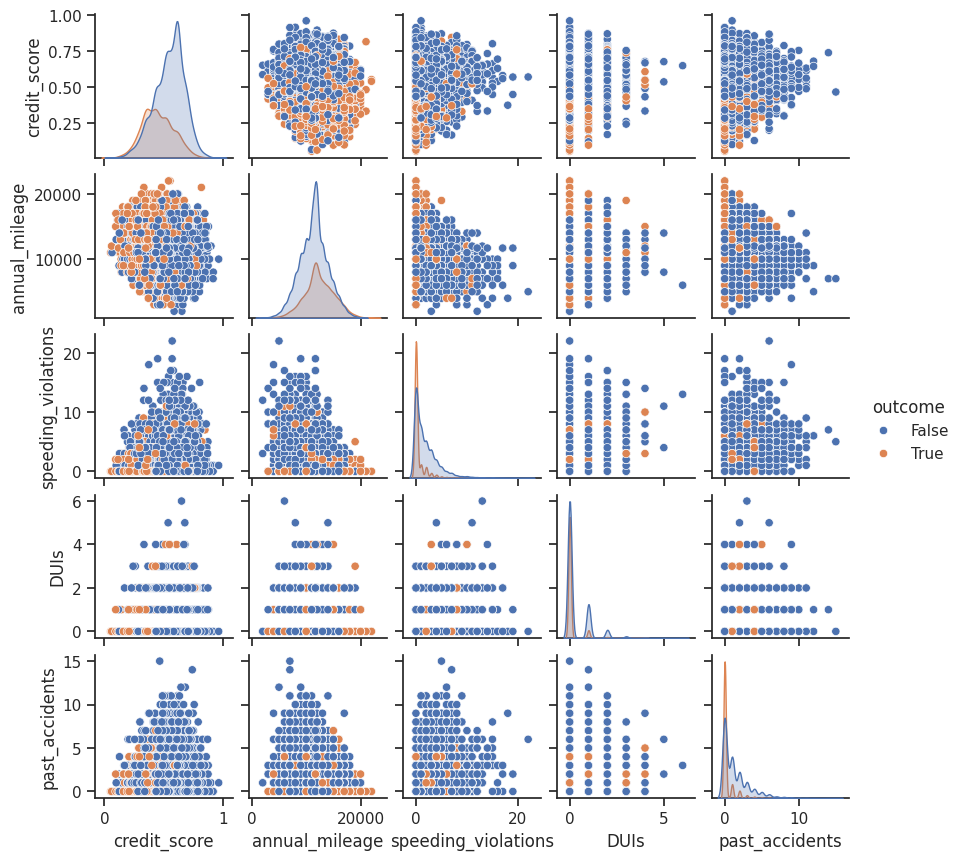

In [281]:
sns.pairplot(df,
             vars=['credit_score', 'annual_mileage', 'speeding_violations', 'DUIs', 'past_accidents'],
             hue="outcome", height=1.75)

Let's look at each row to see if we can find a pattern:
* `credit_score` - most of the orange dots appear towards the bottom of the charts, so there might be a correlation between making a claim and low credit scores - we saw the hint of this relationship earlier
* `annual_mileage` - the orange dots seem regularly distributed throughout, and the shape of the orange density curve in this row is similar to the blue one (except that the blue one has more values)
* `speeding_violations` - the orange dots seem to be more in the lower part of the charts, and there's also a cluster with low speeding violations and high annual mileage, so that's something to investigate further
* `DUIs` - the orange dots are pretty evenly distributed vertically for DUIs, so not much of a correlation
* `past_accidents` - the orange dots seem to be more in the lower part of the graphs, so potentially a correlation between *not* making a claim and having a lot of past accidents (maybe the drivers are being more careful)

🔎 **Observation:** Here are some things to investigate further for a correlation with making an insurance claim:
* low credit scores
* low speeding violations and high annual mileage
* low number of past accidents

### Puling everything together

Let's pull together all of our observations to see if there are other relationships with claim rate that we should consider.

Things that were associated with making a claim:
* low credit scores
* low speeding violations and high annual mileage
* low number of past accidents

Things that were associated with a high claim rate:
* young age
* older vehicles
* no education
* poverty income
* unmarried and 0-9 years driving experience
* men without children

Based on these observations, I have a hypothesis: ***Teenage boys are the most likely to file an auto insurance claim.***

First, let's look at the top set of items that were associated with making a claim and see how they vary by age group.

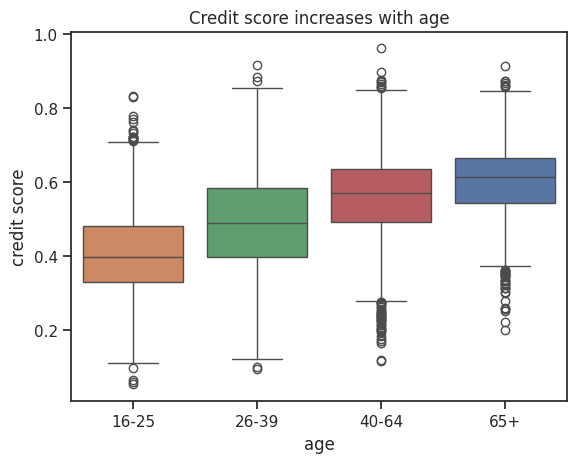

In [282]:
ax = sns.boxplot(data=df, x="age", y='credit_score', hue="age",
            order=['16-25', '26-39', '40-64', '65+'],legend=False)
ax.set_ylabel("credit score")
plt.title("Credit score increases with age")
plt.show()

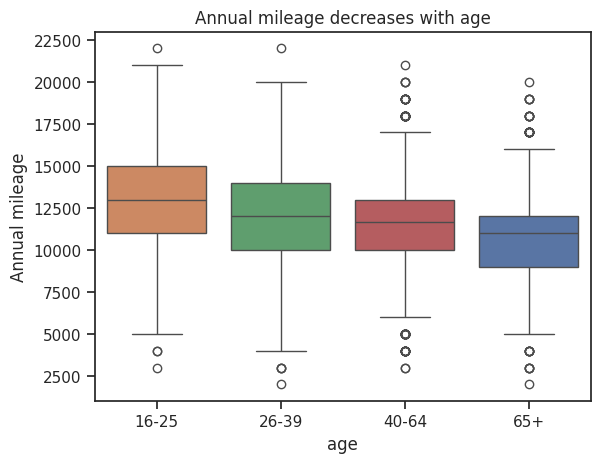

In [283]:
ax = sns.boxplot(data=df, x="age", y='annual_mileage', hue="age",
            order=['16-25', '26-39', '40-64', '65+'],legend=False)
ax.set_ylabel("Annual mileage")
plt.title("Annual mileage decreases with age")
plt.show()

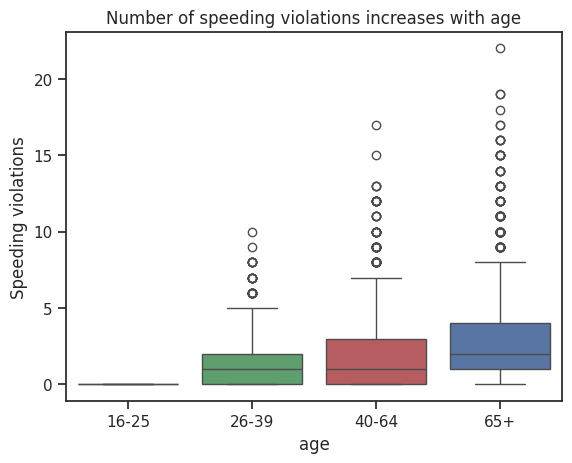

In [284]:
ax = sns.boxplot(data=df, x="age", y='speeding_violations', hue="age",
            order=['16-25', '26-39', '40-64', '65+'],legend=False)
ax.set_ylabel("Speeding violations")
plt.title("Number of speeding violations increases with age")
plt.show()

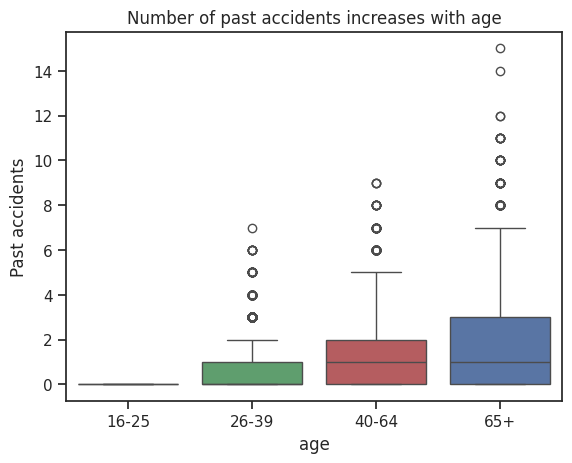

In [285]:
ax = sns.boxplot(data=df, x="age", y='past_accidents', hue="age",
            order=['16-25', '26-39', '40-64', '65+'],legend=False)
ax.set_ylabel ("Past accidents")
plt.title("Number of past accidents increases with age")
plt.show()

These charts confirm that the 16-25 age group has the lowest credit score, highest annual mileage, lowest speeding violations, and lowest past accidents. This supports the idea that age is the main factor in making an insurance claim.

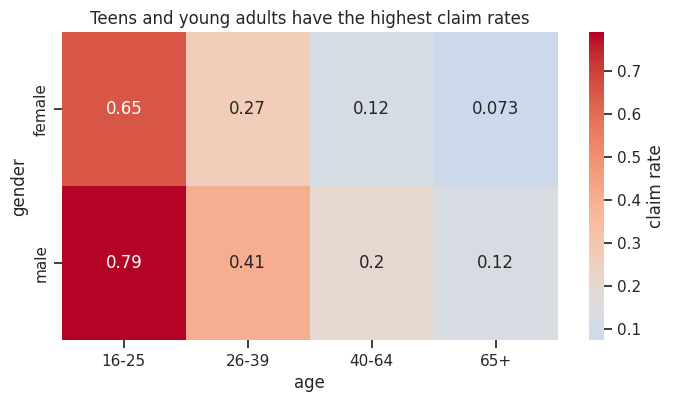

In [286]:
#Create pivot table for gender and age with average claim rate as values
gender_age = pd.pivot_table(data=df,index='gender',columns='age',values='claim_rate')

#Create a heatmap to visualize gender, age and claim rate
plt.figure(figsize=[8,4])
sns.heatmap(gender_age,annot=True,cmap='coolwarm', center=0.15,
            cbar_kws={'label': 'claim rate'})
plt.title("Teens and young adults have the highest claim rates")
plt.show()

Very clearly, we can see that it's teenagers/young adults (both boys and girls) who are more likely to make a claim. In particular, almost 80% of the male clients between 16-25 years old made a car insurance claim in the last year.

Let's just make sure that it's really age and not just lack of driving experience.

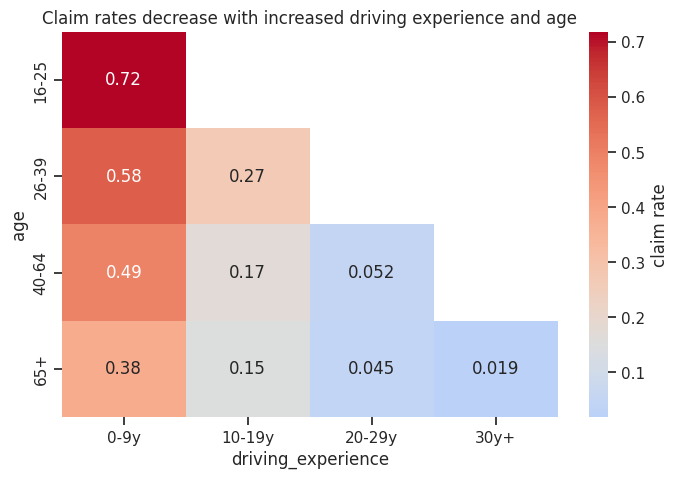

In [287]:
#Create pivot table for driving experience and age with average claim rate as values
age_exp = pd.pivot_table(data=df,index='age',columns='driving_experience',values='claim_rate')

#Create a heatmap to visualize driving experience, age, and claim rate
plt.figure(figsize=[8,5])
sns.heatmap(age_exp,annot=True,cmap='coolwarm', center=0.15,
            cbar_kws={'label': 'claim rate'})
plt.title("Claim rates decrease with increased driving experience and age")
plt.show()

This clearly shows that years of driving experience plays a huge role in the claim rate. Additional years of driving experience seems to greatly reduce the claim rate throughout all of the age groups.

The other items that mapped to high claim rate were
* no education
* poverty income level
* unmarried
* no children

But, all of these could just be mapped to being a teenager or young adult.

To investigate this, let's just pull out only those clients who made a claim and then look at their characteristics.

In [288]:
claim_df = df[df['outcome']==True]
claim_df.head()

,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,annual_mileage,speeding_violations,DUIs,past_accidents,outcome,claim_rate
1,16-25,male,0-9y,none,poverty,0.358,False,before 2015,False,False,16000.0,0,0,0,True,1
4,26-39,male,10-19y,none,working class,0.388,True,before 2015,False,False,12000.0,2,0,1,True,1
7,26-39,female,0-9y,university,working class,0.469,False,after 2015,False,True,14000.0,0,0,0,True,1
9,40-64,female,0-9y,high school,upper class,0.562,True,before 2015,False,True,11000.0,0,0,0,True,1
17,16-25,male,0-9y,none,poverty,0.348,False,before 2015,True,False,12000.0,0,0,0,True,1


We can use the same analysis for the heatmaps as above, but instead of computing mean claim rate, we compute the sum. This provides a count of the claims (or clients, since all clients in this dataset have made a claim) in each category.

In [289]:
age_exp_claims = pd.pivot_table(data=claim_df,index='age',columns='driving_experience',
                                values='claim_rate', aggfunc="sum")
age_exp_claims

driving_experience,0-9y,10-19y,20-29y,30y+
age,,,,
16-25,1448.0,NaN,NaN,NaN
26-39,394.0,638.0,NaN,NaN
40-64,262.0,100.0,95.0,NaN
65+,113.0,49.0,14.0,20.0


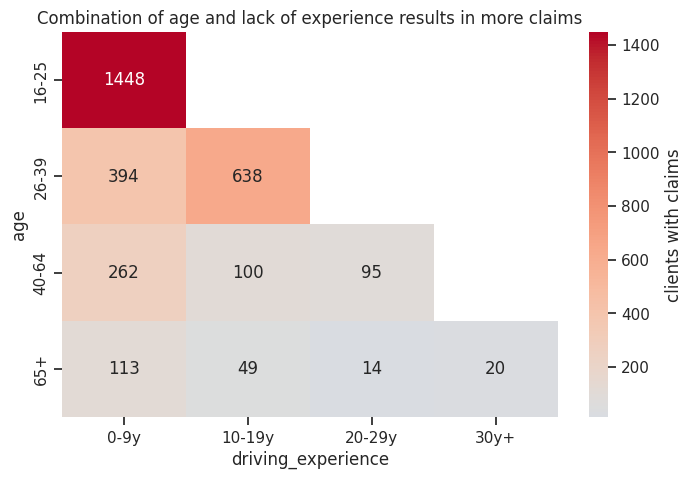

In [290]:
#Create a heatmap to visualize driving experience, age, and claim rate
plt.figure(figsize=[8,5])
sns.heatmap(age_exp_claims,annot=True,fmt=".0f",cmap='coolwarm', center=50,
            cbar_kws={'label': 'clients with claims'})
plt.title("Combination of age and lack of experience results in more claims")
plt.show()

This clearly shows that most of the claims are coming from younger people.

Finally, we'll look at the gender divide. We can use a stacked bar chart to show the number of clients with claims in each age group colored by gender.

Note that there's no native stacked bar chart in regular Seaborn, so we use Seaborn Objects here.

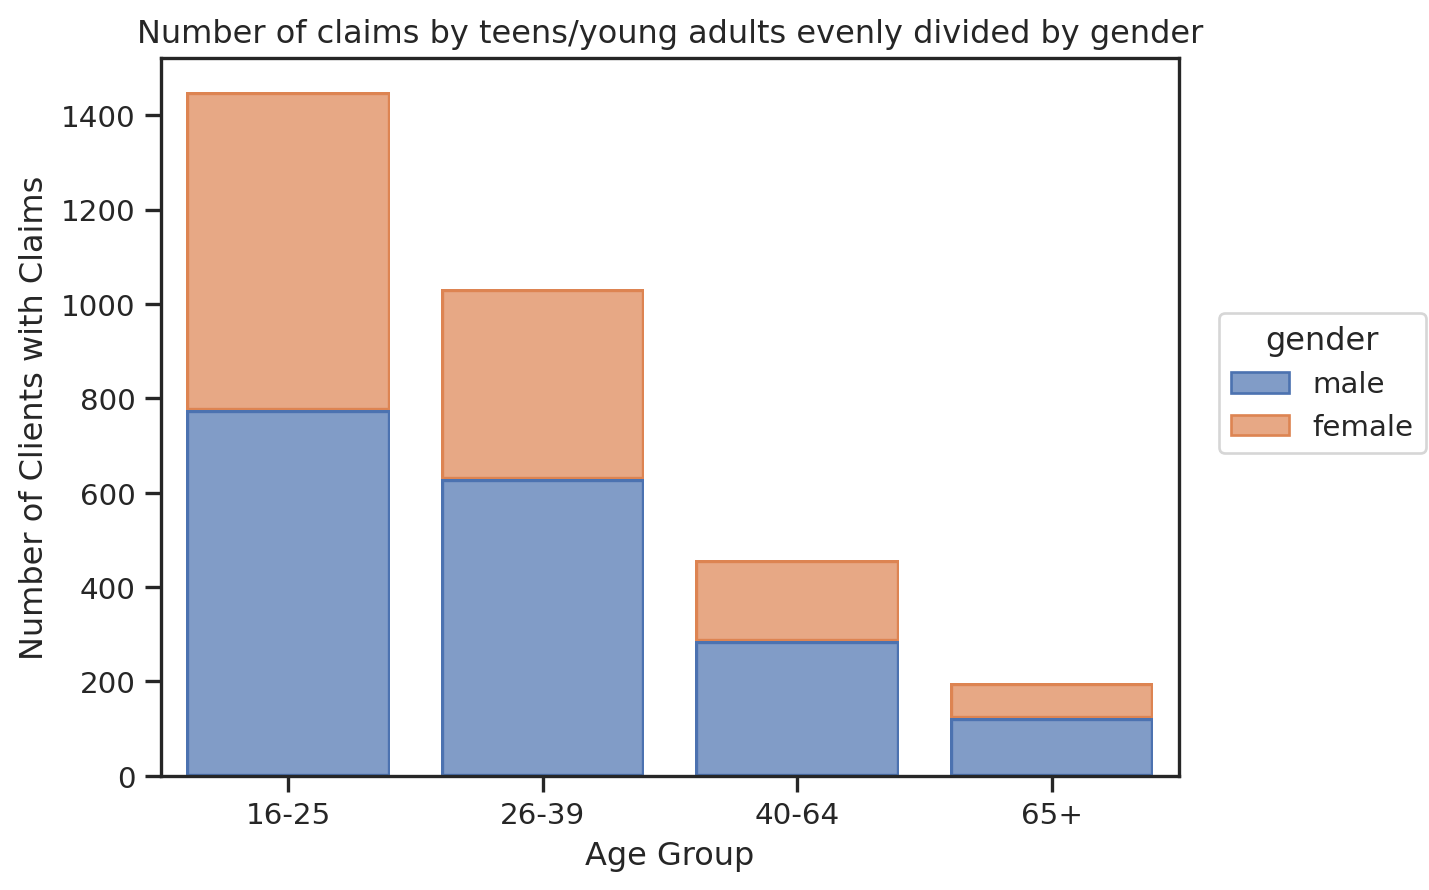

In [291]:
(
    so.Plot(claim_df, x="age", color="gender")
      .add(so.Bar(), so.Count(), so.Stack())
      .scale(x=so.Nominal(order=['16-25', '26-39', '40-64', '65+']))
      .label(y="Number of Clients with Claims", x = "Age Group",
             title="Number of claims by teens/young adults evenly divided by gender")
)

Finally, there are a few more males who make claims than females, but it's not a large difference, especially at the younger age groups.

*Note that the difference between the legend ordering and stack ordering is an open bug in Seaborn Objects, <https://github.com/mwaskom/seaborn/issues/3015>*

We're ending the EDA process example here, but if you were then to take this information and want to present it, you'd need to consider a different way to show the data. Generally a heatmap is not going to be the type of chart that you'd create for presentation, since it's a bit more complex than your standard charts.